In [1]:
import netCDF4     # Note: python is case-sensitive!
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import num2date

In [2]:
data = netCDF4.Dataset('tasAnom_rcp45_land-prob_uk_region_sample_b6190_30y_ann_20091201-20991130.nc')
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    baseline_period: b6190
    collection: land-prob
    contact: ukcpproject@metoffice.gov.uk, UKCP Team, Met Office Hadley Centre
    creation_date: 2018-12-23T16:16:41
    domain: uk
    frequency: ann
    institution: Met Office Hadley Centre (MOHC), FitzRoy Road, Exeter, Devon, EX1 3PB, UK.
    institution_id: MOHC
    prob_data_type: sample
    project: UKCP18
    references: http://ukclimateprojections.metoffice.gov.uk/
    resolution: region
    scenario: rcp45
    source: Probabilistic climate prediction based on family of Met Office Hadley Centre climate models HadCM3, HadRM3 and HadSM3, plus climate models from other climate centres contributing to IPCC AR5 and CFMIP.
    time_slice_type: 30y
    title: UKCP18 probabilistic projections for mean air temperature anomaly at 1.5m (K) for UK land points, for the RCP 4.5 scenario with a 1961-1990 baseline.
    version: v20181122
    Conve

In [3]:
regions = data['geo_region'][:]
regions = [''.join(region.astype(str)).strip() for region in regions]
for region in regions:
    print(region)

East Midlands
East of England
East Scotland
London
North East England
North Scotland
North West England
South East England
South West England
West Midlands
West Scotland
Yorkshire and Humber
Channel Islands
Isle of Man
Northern Ireland
Wales


In [4]:
print(data.variables.keys())

dict_keys(['tasAnom', 'time', 'time_bnds', 'region', 'sample', 'geo_region', 'year'])


In [13]:
temp = data.variables['tasAnom'][:]

In [14]:
region_index = regions.index('South East England')

In [15]:
time = data.variables['time'][:]
year = data.variables['year'][:]
tasAnom_region = data.variables['tasAnom'][:, region_index, :]

In [22]:
tasAnom_region_mean = np.mean(tasAnom_region, axis=1)

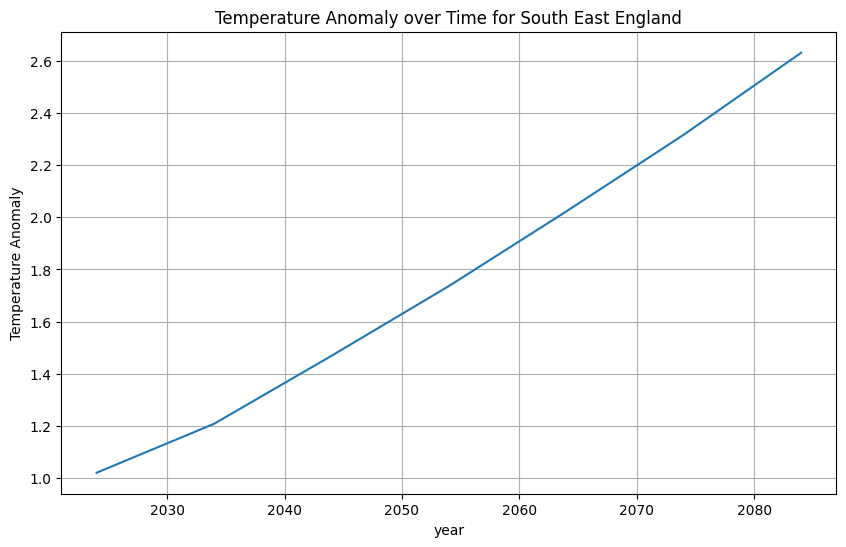

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(year, tasAnom_region_mean)
plt.xlabel('year')
plt.ylabel('Temperature Anomaly')
plt.title('Temperature Anomaly over Time for South East England')
plt.grid(True)
plt.show()
